# Pocket Algorithm

<img align="center" width="500" height="500" src="mnist.png">



With the pocket Algorithm there is a little noise in the data so it can not fully linearly seperable.

In [1]:
using MLDatasets, Images, TestImages                     # using MNIST data set and images

┌ Info: Recompiling stale cache file /home/jayibex/.julia/compiled/v1.1/MLDatasets/9CUQK.ji for MLDatasets [eb30cadb-4394-5ae3-aed4-317e484a6458]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/jayibex/.julia/compiled/v1.1/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/jayibex/.julia/compiled/v1.1/TestImages/cMlD2.ji for TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1184


In [3]:
train_x, train_y = MNIST.traindata()          
test_x, test_y = MNIST.testdata();

Each MNIST image has a size of 28*28 = 784 pixels. Each pixel for simplicity is treated as being off or on, see image of the six. The black pixel are on and the outliers are off.

In [4]:
size(train_x)                                            

(28, 28, 60000)

In [5]:
size(train_y)

(60000,)

In [6]:
size(train_x[:,:,1])

(28, 28)

In [7]:


X = [reshape(train_x[:,:,i], 784, 1) for i = 1:60000] 
size(X)



(60000,)

The pixels are trained and reshaped into a vector, sort of like a train and fit into the algorithm one at a time, As the image below depicts:
&nbsp;

>


In [8]:
size(reshape(train_x[:,:,1], 784, 1)) 

(784, 1)

┌ Info: Recompiling stale cache file /home/jayibex/.julia/compiled/v1.1/ImageMagick/0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1184


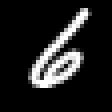

In [9]:
colorview(Gray, train_x[:, :, 1000]')

In [10]:
train_y[1000]

6

In [11]:
pocket_train_x = []
pocket_train_y = []
indices = []
for i = 1:6000
    if train_y[i] == 1 || train_y[i] == 6
        push!(pocket_train_x, reshape(train_x[:,:,i], 784))
        push!(pocket_train_y,  train_y[i] == 1 ? 1 : -1)
    end
end



In [12]:
size(pocket_train_x[1])

(784,)

In [13]:
w = rand(785)

function sign(w, x)
    x = push!(copy(x), 1.0)
    return w'x > 0 ? 1 : -1
end


function errors(w)
    return sum([sign(w, pocket_train_x[i]) != pocket_train_y[i] ? 1 : 0
            for i = 1:size(pocket_train_x)[1]])
    
end



errors (generic function with 1 method)

In [14]:
function pocket_algorithm(w, T)    
    w_hat = copy(w)
    for i = 1:T
        for j = 1:size(pocket_train_x)[1]
            #println(size(pocket_train_x[j]))
            if sign(w, pocket_train_x[j]) != pocket_train_y[j]  
                w += pocket_train_y[j] * push!(copy(pocket_train_x[j]),1.0)
                if errors(w) < errors(w_hat)
                    w_hat = copy(w)
                end
            end
        end
    end
    return w_hat
end

pocket_algorithm (generic function with 1 method)

In [15]:
errors(w)

608

In [16]:
w = rand(785)
w_new = pocket_algorithm(w,10)

785-element Array{Float64,1}:
 0.5959251231795368  
 0.9923867472045265  
 0.12194867999910164 
 0.07501333631035245 
 0.27859140647655933 
 0.3510593063474716  
 0.5270747153537438  
 0.6153079379229636  
 0.149130796484094   
 0.3963051384229008  
 0.6230618703044437  
 0.2098643210729676  
 0.20261977238859918 
 ⋮                   
 0.023401411186317445
 0.1853941173460083  
 0.8498575066337295  
 0.4856908133825475  
 0.47548480266702153 
 0.9955759180708612  
 0.28413598451202193 
 0.5769003416789118  
 0.10731311903403085 
 0.5292691163139747  
 0.2413585197891901  
 0.7255559803912075  

In [18]:
sign(w_new, pocket_train_x[6]) 

-1

In [19]:
function check_value(i)
    println("The predicted value is")
    println(sign(w_new, reshape(test_x[:,:,indices[i][1]], 784)) == 1 ? 1 : 5)
    colorview(Gray, test_x[:,:,indices[i][1]]')
end
#[reshape(train_x[:,:,i], 784, 1) for i = 1:60000]

check_value (generic function with 1 method)

In [ ]:
check_value(5)

The predicted value is


In [ ]:
indices

In [ ]:
indices = []
for i in 1:size(test_y)[1]
    if test_y[i] == 1 || test_y[i] == 5
        push!(indices, (i,test_y[i]))
    end
end

In [ ]:
println("The predicted value is")
println(sign(w_new, reshape(test_x[:,:,3], 784)) == 1 ? 1 : 5)
colorview(Gray, test_x[:,:,3]')